# Введение в искусственные нейронные сети
# Урок 3. Keras

## Содержание методического пособия:


<ol>
<li>Способы создания нейросетей</li>
<li>Что такое Keras</li>
<li>Основы синтаксиса</li>
<li>Простая нейросеть на Keras</li>
</ol>

## Способы создания нейросетей

Нейросети это математические модели. Программирую на любом языке можно решать задачи связанные с математикой. Однако встает вопрос какой язык подойдет для этого больше? Не считая учебных нейросетей, нейросети как правило работают с большим количеством данных. Поэтому, чтобы обучение нейросетей происходило с приемлимой скоростью нужно использовать быстрый язык. Например Си. Но так как язык Си это язык с низким уровнем абстракции то программировать и модифицировать на нем нейросети было бы крайне затруднительно. 

Хорошо может подойти для этих целей язык Python. Так как он с одной стороны имеет высокий уровень абстракции с другой стороны операции с массивами данных могут сделать его библиотеки написанные на Си. Таким способом мы пользовались на первых 2 уроках. Однако если писать нейросети таким образом то будет много повторяющегося кода поскольку архитектуры нейросетей остаются одинаковыми и зачастую у них только меняются параметры. Кроме этого нам может понадобиться хорошо знать архитектуры самых разных нейронных сетей чтобы реализовать их вручную. Работа таким образом затруднительна для людей не имеющих достаточной подготовки, а для имеющих может быть нааборот рутиной.

Существуют фреймворки для созданий нейронных сетей. Они являются, пожалуй основным рабочим способом создания нейронных сетей. Вот их неполный перечень:

1. TensorFlow
2. PyTorch
3. Keras
4. Microsoft Cognitive Toolkit (CNTK)
5. Caffe
6. Apache MXNet

Упрощение создания нейронных сетей не заканчивается на этих фрейворках. Существуют инструменты которые позволяют создавать нейронные сети без навыков программирования, строя нейросети графически. Примеры: Neural Designer, Deep Learning Studio.

Но и на этом не заканчиваются способы создания нейросетей. Существуют инструменты самостоятельно создающие нейронные сети. Это так называемые AutoML инструменты. Вот примеры популярных из них:
1. MLBox
2. TPOT
3. Autokeras

Как вы возможно заметили что все эти инструменты отранжированы походы изложения в порядке возрастания уровня абстракции. Соответсвенно говоря о плюсах минусах того или иного инструмента мы должны понимать в принципе плюсы минусы повышения уровня абстракции. Чем он выше тем меньше производительность и тем меньше его гибкость и набоорот.

Как уже было сказано наиболее востребованных в рабочих целях является тот уровень абстракции, который дают фреймворки. Будем изучать дальше и пользовать ими. Остается сделать выбор среди них. Самый популярный фреймворк для создания нейросетей TensorFlow. Самый популярный для обучения - Keras. На этом уроке мы изучим с вами Keras, а на следующим TensorFlow. Также стоит отметить, что эти фреймворки взаимосвязаны - Keras как правило работает поверх TensorFlow, а сам TensorFlow позволяет пользовать средствами Keras при необходимости.


## Что такое Keras

Keras появился относительно недавно - в 2015 г. Но за это время стал одним из самых популярных фреймоворков для создания нейросетей и фактически стандартом для использования его начинающими.

В чем причина его популярности? Keras позволяет создовать на высоком уровне абстракции. Т.е. на не нужно вручную реализовать с помощью математикаподобного кода те или иные элементы нейронной сети. Мы можем оперировать слоями, количеством нейронов в них, выбором функции активации и т.д. В тоже время keras содержит инструментарий для всего того, что может понадобиться для работы - например ряд встроенных датасетов, возможность обрабатывать изображения.

В техническом плане Keras это оболочка над инструментами меньшей степени абстракции. На выбор он может работать поверх TensorFlow, Microsoft Cognitive Toolkit, R, Theano, PlaidML.

Keras пользуется также на соревнованиях Kaggle.

Однако стоит отметить, что в реальных проектах чаще используется TensorFlow, который мы будем изучать в след. уроках.

Keras как и любой высокобастрактный инструмент имеет изъяны в качестве меньшей гибкостью и производительснотью чем тот же tensorflow.

Стоит также отметить, что Google официально поддерживает Keras, его автор François Chollet, является сотрудником Google. TensorFlow сам в свою очередь позволяет использовать возможности Keras, т.е. в нем заложена возможность переходить на более высокой уровень абстракции.

В данном уроке мы с вами рассмотрим пример обучения нейронной сети с помощью Keras. Но прежде давайте посмотрим на основы синтаксиса Keras и стандартные задачи, которые нужно выполнить при обучении нейронной сети.

## Основы синтаксиса

**Установка и работа с данными**

Для начала необходимо установить keras. Надо полагать вы хорошо знакомы с командой pip.

sudo python3 pip install keras

Давайте попробуем получить датасет mnist и проанализировать его содержимое.
Это еще не будет синтаксис Keras, но это часто встречающаяся задача. Не обращайте внимание на предупреждения от TensorFlow. Их часто бывает много и их можно подавить при необходимости.

In [3]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 511.7 MB 17 kB/s              █████▌       | 391.4 MB 391 kB/s eta 0:05:08 
     |████████████████████████████████| 123 kB 1.2 MB/s            
     |████████████████████████████████| 57 kB 1.3 MB/s            
     |████████████████████████████████| 4.5 MB 2.1 MB/s            
     |████████████████████████████████| 4.5 MB 987 kB/s            
     |████████████████████████████████| 42 kB 606 kB/s            
     |████████████████████████████████| 14.5 MB 175 kB/s            
     |████████████████████████████████| 65 kB 2.0 MB/s            
     |████████████████████████████████| 1.1 MB 1.0 MB/s            
     |████████████████████████████████| 5.8 MB 362 kB/s            
     |████████████████████████████████| 2.4 MB 779 kB/s            
     |████████████████████████████████| 438 kB 3.1 MB/s            
     |████████████████████████████████| 77 kB 2.3 MB/s      

In [1]:
import numpy as np
import mnist
import keras

# The first time you run this might be a bit slow, since the
# mnist package has to download and cache the data.
train_images = mnist.train_images()
train_labels = mnist.train_labels()

print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

2022-07-03 18:07:35.814299: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-03 18:07:35.814325: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


(60000, 28, 28)
(60000,)


Что в данном случае мы смогли с вами узнать? Что тренировочный датасет mnist состоит из 60000 изображений 28 на 28 пикселей. Такие небольшие датасеты с маленькими изображениями встретятся вам и в других учебных датасетах.

Что нам нужно делать теперь? Если скаченный нами датасет не имеет разделения на тренировочный и тестовый то поделить их. В нашем случае наш тренировочный датасет состоит из 60 000 изображений и тестовый из 10 000 и они поделены по умолчанию.

Нам теперь нужно конверитировать значения пикселей из вида от 1 до 255 в набор значений от -0.5 до 0.5.



In [2]:
import numpy as np
import mnist

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


**Создание модели**

После первичной подготовки данных дальше как правило следует создание модели нейронной сети, которая будет учиться на этих данных.

Ниже типичный код учебной нейросети - 

    # define the keras model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

Давайте разберемся с теми командами, которые нам встетились в этом коде.

Sequential - позволяет создать нейросети где слои имеют форму стека. Сигнал в них передается от одного слоя к другому. В противовес этой разновидности есть нейросети где сигнал может не сразу передаваться в следующий слой а попадать в цикл. Такие нейросети мы разберем в следующих уроках.

Dense - позволяет каждому нейронну быть связанному с другим нейронном. В противовес этом может быть необходимость не делать так много связей. Неполносвязнные архитектуры мы также разберем на этом курсе, они основа компьютерного зрения.

Цифры 12, 8, 1 обозначают количество нейронов в каждом конкретном слое

Activation - позволяет определить формулу по которой будет активироваться нейрон.

**Компиляция модели**

На этапе компиляции модель с заданными параметрами ранее создается. Вот типичный учебный пример:

    
    # создание keras модели
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Однако на этой стадии мы должны сделать еще некоторые настройки нейронной сети. Разберем команды из кода выше.

loss - позволяет задать формулы по которой будет определяться степень ошибки нейронной сети.

optimizer - позволяет задать алгоритм, который будет осуществлять изменения весов по всей нейронной сети (backpropagation)

metrics - позволяет опредилить кретирии по которым будет оцениваться степень обученности нейросети.
    
    

**Передача данных для обучения нейросети**

После того как нейросеть создана можно передавать ей данные для обучения. Ниже типичный пример кода для этого.


    # передача обучающего датасета keras модели
    model.fit(X, y, epochs=150, batch_size=10, verbose=0)

Разберем команды из этого примера.
X, y - содержат все обучающие данные
epochs - определяет сколько раз через нейросеть должен пройти весь набор данных
bath_size - определяет количество обучающих примеров передающихся нейросети на каждой итерации обучения.
verbose - позволяет определять информацию, котору вы видете во время обучения нейронной сети.

**Оценка обученности нейронной сети**

Следующей стадией может быть проверка обученности нейронной сети. Команда Keras для этих целей - 

    results = model.evaluate(x_test, y_test, batch_size=128)
    
В данном случае мы просто указываем какую модель на каких данных мы хотим проверить

**Запуск нейронной сети для выполнения работы**

На этой стадии мы можем попробовать запустить нейронную сеть на данных которые мы хотели бы чтобы она оценила. Осуществить распознования объекта на фотографии например.
Вот код для этих целей - 

    predictions = model.predict(x_test[:3])
    
В качестве аргумента здесь указывается массив даныхх содержащих, например фотографию в виде массива чисел.    
    

Мы с вами рассмотрели основные стадии процесса обучения нейросети и команды Keras, для этого. Безусловно здесь приведен далеко неполный перечень возможностей Keras. У Keras есть также возможность сохранять созданную нейросеть, запускать уже имеющиюся, различные средства для создания нейросетей разных архитектур и другое. С чем то из арсенала Keras мы с вами познакомимся по ходу курса, а с остальным вы можете познакомиться на сайте Keras в разделе документация.

## Простая нейросеть на Keras

Давайте попрубуем сделать нейросеть на Keras использую полученные выше знания. Попробуем обучить нейросеть различать рукописные цифры.

In [3]:
import matplotlib.pyplot as plt

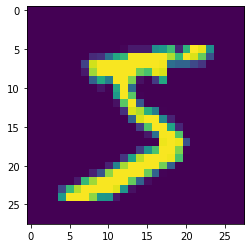

In [4]:
plt.imshow(mnist.train_images()[0])

In [5]:
train_images.shape

(60000, 784)

**Далее будет использоваться функция активации Softmax**

Стандартная функция активации при решении задачи классификации. Softmax нормирует предсказания модели, приводя в диапазон [0, 1], который соответствует значению вероятности принадлежности к классу; т.е. результат работы softmax - вектор вероятностей принадлежности каждому классу.
Логика как для применения сигмоиды в логрегрессии в том же ключе: преобразуем действительные числа в положительные R -> [0, +$\infty$), затем положительные в вероятности [0, +$\infty$) -> [0, 1]. 

$Softmax = \frac{e^{z_i}}{\sum_j^K e^{z_j}}$

Почему первое преобразование - именно экспонента? Исторически и потому что красиво дифференцируется $({e^x})' = {e^x}$, с тем же успехом мы могли бы считать $\frac{42^{z_i}}{\sum_j^K 42^{z_j}}$, изменение основания степени только скалирует данные, не меняя сути.

In [44]:
# The full neural network code!
###############################
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

# Build the model.
model = Sequential([
  Dense(256, activation='relu', input_shape=(784,)),  #аргумент input_shape задает вид входных данных, необходим для 1-го слоя. альтерантивно можно создать отдельный слой inout перед первым полносвяным
  Dense(128, activation='elu'),
#   Dense(256, activation='selu'),
#   Dense(128, activation='selu'),  
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=13,
  batch_size=128,
)

# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

# Save the model to disk.
model.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

Epoch 1/13
469/469 [==============================] - 2s 4ms/step - loss: 0.3355 - accuracy: 0.8977
Epoch 2/13
469/469 [==============================] - 2s 4ms/step - loss: 0.1487 - accuracy: 0.9549
Epoch 3/13
469/469 [==============================] - 2s 4ms/step - loss: 0.1083 - accuracy: 0.9663
Epoch 4/13
469/469 [==============================] - 2s 4ms/step - loss: 0.0838 - accuracy: 0.9740
Epoch 5/13
469/469 [==============================] - 2s 5ms/step - loss: 0.0699 - accuracy: 0.9775
Epoch 6/13
469/469 [==============================] - 2s 5ms/step - loss: 0.0616 - accuracy: 0.9808
Epoch 7/13
469/469 [==============================] - 2s 5ms/step - loss: 0.0525 - accuracy: 0.9830
Epoch 8/13
469/469 [==============================] - 2s 5ms/step - loss: 0.0467 - accuracy: 0.9852
Epoch 9/13
469/469 [==============================] - 2s 5ms/step - loss: 0.0433 - accuracy: 0.9858
Epoch 10/13
469/469 [==============================] - 2s 5ms/step - loss: 0.0380 - accuracy: 0.9878

In [14]:
predictions = model.predict(test_images)
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

print(test_labels) # [7, 2, 1, 0, 4]

313/313 [==============================] - 1s 1ms/step
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [16]:
Dense?

в стоке .9650
увеличение числа нейронов в слоях вдвое дало рост accuracy на 0.5%.
При установке в качестве функции активации tanh accuracy падает почти на 1%.
При добавлении двух слоев так же метрика упала почти на процент.
Игра с параметрами больших результатов не дает - результат на тестовых данных плавает в районе 0.965-0.979, до 0.98 один раз допрыгнуло). Есть подозрение, что вина в стохастической природе сети... возможно если перед каждым запуском обучения вручную сидировать генератор numpy то можно будет




**Как определяется количество параметров слоя?**

Рассмотрим входной слой. Пусть он состоит из N нейронов, каждый нейрон имеет свой вектор (или свою матрицу, в зависимости от размерности ввода) весов длины k, совпадающей с количеством столбцов в матрице признаков. Вдобавок, по умолчанию к весам добавляется свободный член b - параметр смещения, в другой терминологии bias, intersect (bias можно не создавать, если при создании слоя передать именной аргумент use_bias=False). Тогда количество настраевымых параметров слоя = количество нейронов * (количество весов для признаков + свободный член) = N * (k + 1). Для следующего слоя из M нейронов на вход придет N признаков с предыдущего, т.е. у него будет M * (N + 1) настраевымых параметров, и так далее.

In [8]:
(28 * 28 + 1) * 64

50240

In [9]:
(64 + 1) * 64

4160

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.layers

In [12]:
for layer in model.layers:
  print(layer.name, layer.input.shape)

dense (None, 784)
dense_1 (None, 64)
dense_2 (None, 64)


In [13]:
model.load_weights('model.h5')

## Практическое задание

<ol>
    <li>Попробуйте обучить, нейронную сеть на Keras(рассмотренную на уроке) на датасете MNIST с другими параметрами. 
        Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?</li>
    <li>Поработайте с документацией Keras. Попробуйте найти полезные команды Keras неразобранные на уроке.</li>
</ol>

## Дополнительные материалы

<ol>
    <li>https://keras.io/</li>
</ol>

## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://keras.io/</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>Википедия</li>
    
</ol>